# Results 2b: Similarity Analysis

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from tqdm import tqdm
sns.set_style('white')
sns.set_context('notebook', font_scale=1.33)
%matplotlib inline

## Section 2: Proportion of Participants Flagged 

#### 2.1 Accuracy

```python
from scipy.stats import binom_test
binom_test(38, n=90, p=0.33, alternative='greater')
```

In [15]:
from statsmodels.stats.proportion import proportions_ztest

## Perform 2-sample proportion test.
zval, pval = proportions_ztest([18, 8], [186, 200])
print('z = %0.3f, p = %0.3f' %(zval, pval))

reject.groupby('platform').accuracy.agg(
    mean = lambda x: (x < 0.38).mean(),
    sum = lambda x: (x <0.38).sum(),
    count = lambda x: x.size
).round(2)

z = 2.224, p = 0.026


,mean,sum,count
platform,,,
mturk,0.10,18.0,186.0
prolific,0.04,8.0,200.0


#### 2.2 Infrequency Items

In [16]:
from statsmodels.stats.proportion import proportions_ztest

## Perform 2-sample proportion test.
zval, pval = proportions_ztest([50, 35], [186, 200])
print('z = %0.3f, p = %0.3f' %(zval, pval))

reject.groupby('platform').infreq.agg(
    mean = lambda x: (x > 0).mean(),
    sum = lambda x: (x > 0).sum(),
    count = lambda x: x.size
).round(2)

z = 2.223, p = 0.026


,mean,sum,count
platform,,,
mturk,0.27,50,186
prolific,0.18,35,200


## Section 3: Metric Correspondence

In [17]:
## Define variables of interest.
cols = ['infreq','isd','reliability','mahalanobis','survey-rt','variability','accuracy','wsls','task-rt']

## Precompute lower triangular indices.
ix = np.tril_indices(len(cols), k=-1)

## Precompute space for results.
tril = np.zeros((ix[0].size, 3))
fwer = np.zeros((ix[0].size, 3))

#### 3.1 Monotonic Dependence (Unthresholded)

In [18]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define number of permutations.
n_iter = 5000

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Permutation testing.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

## Compute and store true lower diagonal.
tril[:,0] = reject[cols].corr(method='spearman').values[ix]

## Preallocate space.
max_rho = np.zeros(n_iter)

## Main loop.
for i in tqdm(range(n_iter)):
    
    ## Permute DataFrame.
    permuted = reject[cols].apply(np.random.permutation).copy()
    
    ## Compute correlation matrix.
    permuted = permuted.corr(method='spearman').values[ix]
    
    ## Store.
    max_rho[i] = np.abs(permuted).max()
    
## Compute adjusted p-values.
fwer[:,0] = ((np.abs(tril[:,0]) <= max_rho[:,np.newaxis]).sum(axis=0) + 1) / n_iter

100%|██████████| 5000/5000 [00:51<00:00, 97.60it/s]


#### 3.2 Rejection Similarity (Thresohold = 25%) 

In [19]:
from scipy.spatial.distance import dice

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define quantile.
q = 0.25

## Define number of permutations.
n_iter = 5000

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Threshold parameters. 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Copy reject DataFrame.
thresh = reject[cols].copy()

## Threshold variables.
thresh['infreq'] = np.where( thresh['infreq'] > 0, 1, 0 )
thresh['isd'] = np.where( thresh['isd'] > thresh['isd'].quantile(1-q), 1, 0 )
thresh['reliability'] = np.where( thresh['reliability'] < thresh['reliability'].quantile(q), 1, 0 )
thresh['mahalanobis'] = np.where( thresh['mahalanobis'] > thresh['mahalanobis'].quantile(1-q), 1, 0 )
thresh['survey-rt'] = np.where( thresh['survey-rt'] < thresh['survey-rt'].quantile(q), 1, 0 )
thresh['variability'] = np.where( thresh['variability'] > thresh['variability'].quantile(1-q), 1, 0 )
thresh['accuracy'] = np.where( thresh['accuracy'] < thresh['accuracy'].quantile(q), 1, 0 )
thresh['wsls'] = np.where( thresh['wsls'] < thresh['wsls'].quantile(q), 1, 0 )
thresh['task-rt'] = np.where( thresh['task-rt'] > thresh['task-rt'].quantile(1-q), 1, 0 )

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Permutation testing.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

## Compute and store true lower diagonal.
tril[:,1] = 1 - thresh[cols].corr(method=dice).values[ix]

## Preallocate space.
max_rho = np.zeros(n_iter)

## Main loop.
for i in tqdm(range(n_iter)):
    
    ## Permute DataFrame.
    permuted = thresh[cols].apply(np.random.permutation).copy()
    
    ## Compute correlation matrix.
    permuted = 1 - permuted.corr(method=dice).values[ix]
    
    ## Store.
    max_rho[i] = np.abs(permuted).max()
    
## Compute adjusted p-values.
fwer[:,1] = ((np.abs(tril[:,1]) <= max_rho[:,np.newaxis]).sum(axis=0) + 1) / n_iter

100%|██████████| 5000/5000 [00:44<00:00, 111.65it/s]


#### 3.3 Rejection Similarity (Thresohold = 10%) 

In [20]:
from scipy.spatial.distance import dice

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Define quantile.
q = 0.10

## Define number of permutations.
n_iter = 5000

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Threshold parameters. 
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Copy reject DataFrame.
thresh = reject[cols].copy()

## Threshold variables.
thresh['infreq'] = np.where( thresh['infreq'] > 0, 1, 0 )
thresh['isd'] = np.where( thresh['isd'] > thresh['isd'].quantile(1-q), 1, 0 )
thresh['reliability'] = np.where( thresh['reliability'] < thresh['reliability'].quantile(q), 1, 0 )
thresh['mahalanobis'] = np.where( thresh['mahalanobis'] > thresh['mahalanobis'].quantile(1-q), 1, 0 )
thresh['survey-rt'] = np.where( thresh['survey-rt'] < thresh['survey-rt'].quantile(q), 1, 0 )
thresh['variability'] = np.where( thresh['variability'] > thresh['variability'].quantile(1-q), 1, 0 )
thresh['accuracy'] = np.where( thresh['accuracy'] < thresh['accuracy'].quantile(q), 1, 0 )
thresh['wsls'] = np.where( thresh['wsls'] < thresh['wsls'].quantile(q), 1, 0 )
thresh['task-rt'] = np.where( thresh['task-rt'] > thresh['task-rt'].quantile(1-q), 1, 0 )

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Permutation testing.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
np.random.seed(47404)

## Compute and store true lower diagonal.
tril[:,2] = 1 - thresh[cols].corr(method=dice).values[ix]

## Preallocate space.
max_rho = np.zeros(n_iter)

## Main loop.
for i in tqdm(range(n_iter)):
    
    ## Permute DataFrame.
    permuted = thresh[cols].apply(np.random.permutation).copy()
    
    ## Compute correlation matrix.
    permuted = 1 - permuted.corr(method=dice).values[ix]
    
    ## Store.
    max_rho[i] = np.abs(permuted).max()
    
## Compute adjusted p-values.
fwer[:,2] = ((np.abs(tril[:,2]) <= max_rho[:,np.newaxis]).sum(axis=0) + 1) / (n_iter + 1)

100%|██████████| 5000/5000 [00:41<00:00, 120.76it/s]


#### 3.4 Plotting

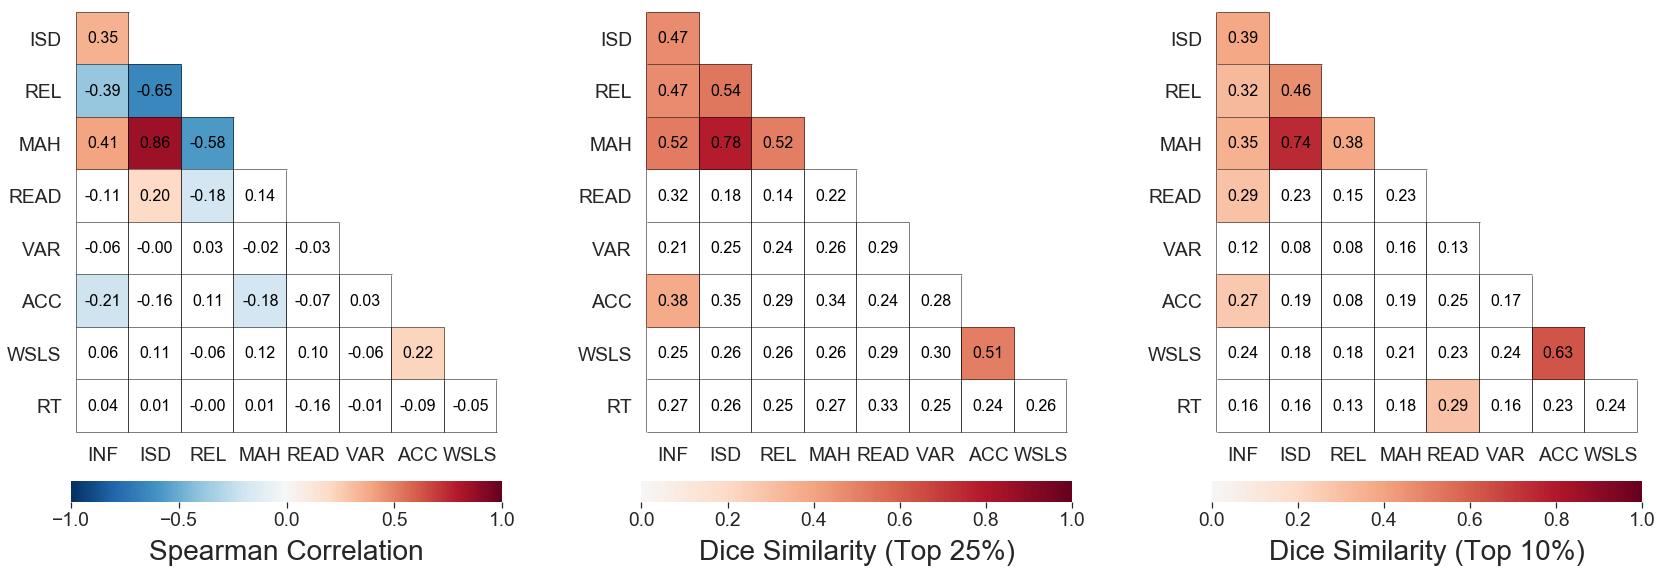

In [21]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
sns.set_style('white')
sns.set_context('notebook', font_scale=1.75)
%matplotlib inline

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Plotting parameters.
vmins = [-1, 0, 0]
titles = ['Spearman Correlation', 'Dice Similarity (Top 25%)', 'Dice Similarity (Top 10%)']
labels = ['INF','ISD','REL','MAH','READ','VAR','ACC','WSLS','RT']

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Plotting.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Initialize canvas.
fig = plt.figure(figsize=(24,8))

## Predefine grids.
grids = [
    fig.add_gridspec(1, 1, top=0.99, bottom=0.13, left=0.04, right=0.34),
    fig.add_gridspec(1, 1, top=0.99, bottom=0.13, left=0.37, right=0.67),
    fig.add_gridspec(1, 1, top=0.99, bottom=0.13, left=0.70, right=1.00),
]

## Iteratively plot.
for i, (vmin, title) in enumerate(zip(vmins, titles)):

    ## Define correlation matrix.
    corr = np.zeros((len(cols),len(cols)))
    corr[ix] = tril[:,i]
    
    ## Define mask.
    mask = np.copy(corr)
    mask[ix] = np.where(fwer[:,i] >= 0.05, True, False) 
    mask[np.triu_indices_from(mask)] = True
    
    ## Remove self-correlations.
    corr = corr[1:,:-1]
    mask = mask[1:,:-1]
    
    ## Initialize axis.
    ax = fig.add_subplot(grids[i][0])
    
    ## Make space for colorbar.
    divider = make_axes_locatable(ax)
    cbar_ax = divider.append_axes("bottom", size="5%", pad=0.6)
    
    ## Plot correlation matrix.
    sns.heatmap(corr, vmin=vmin, vmax=1, center=0, cmap='RdBu_r', cbar=True, 
                square=True, mask=mask, ax=ax, cbar_ax=cbar_ax,
                cbar_kws=dict(orientation="horizontal"))
    
    ## Update colorbar.
    cbar = ax.collections[0].colorbar
    cbar.set_label(title, fontsize=28, labelpad=10)
    
    ## Fix axes. Add label.
    ax.set(xlim=(-0.1,8.1), xticks=np.arange(8)+0.5, ylim=(8.1,-0.1), yticks=np.arange(8)+0.5, )
    ax.set_xticklabels(labels[:-1])
    ax.set_yticklabels(labels[1:],rotation=0)
        
    ## Add annotations.
    for i in range(corr.shape[0]):
        for j in range(i, corr.shape[1]):
            
            ## Define font properties.
            if not mask[j,i]: fontsize = 16
            else: fontsize=16
                
            ## Annotate.
            ax.text(i+0.5, j+0.5, '%0.2f' %corr[j,i], ha='center', va='center', 
                    color='k', fontsize=fontsize)
    
    ## Add gridlines.
    adj = -1e-2
    for i in range(9):
        ax.hlines(i+adj, 0, min([8,i+1]), linewidth=0.5)
        ax.vlines([i+adj,i+1+adj], 8, i, linewidth=0.5)

## Save figure.
f = os.path.join('..','figures','main_02b.png')
plt.subplots_adjust(top=0.95, left=0.02, right=0.98)
plt.savefig(f, dpi=300)